<a href="https://colab.research.google.com/github/yuu067/MIA-IABD-2425/blob/main/UD04/notebooks/EX2.-navegant_camera_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hacemos un seguidor de línea usando la cámara robot

Esta vez, haremos un seguidor de línea usando la cámara del robot. Para hacer esto, usaremos la cámara para capturar imágenes del suelo y procesarlas para detectar la línea. Luego usaremos la información obtenida para controlar el robot y hacer que siga la línea.

Para hacer esto, usaremos la librería `opencv` para procesar imágenes y `aitk.robots` para controlar el robot.

Comencemos por instalar e importar las librerías necesarias:

In [33]:
%pip install aitk numpy opencv-python-headless scikit-fuzzy matplotlib requests Pillow==9.4

In [34]:
import aitk.robots as bots
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Seguidor de línea simple

Crearemos el mundo de Robot y Robot. Necesitaremos la imagen del mapa para este ejemplo (tienes 5 diponibles de `EX2_pista_1.png` a `EX2_pista_5.png`), contiene una pista con una línea negra.

El robot tendrá una cámara que capturará imágenes del suelo y las procesará para detectar la línea. Será de tipo `GroundCamera` y la añadiremos al robot.

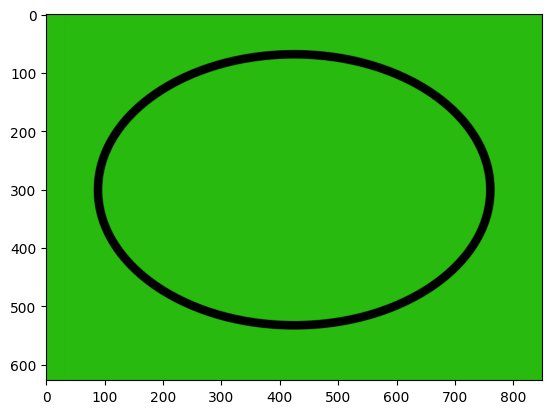

In [35]:
nom_imatge = "EX2_pista_4.png"

# Cargamos la imagen en una variable

img = cv2.imread(nom_imatge)

# Mostramos la imagen
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [60]:
world = bots.World(230, 180, boundary_wall_color="yellow", ground_image_filename=nom_imatge)

robot = bots.Scribbler(x=25, y=90, a=90)
robot.add_device(bots.GroundCamera(width=80, height=50))

world.add_robot(robot)

world.watch()

Random seed set to: 2295018


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x0…

Implementa la función `controlador_cam` que será el que tendrá que controlar el robot. Puedes basarte en el ejemplo hecho en [`1.-Introduccio_OpenCV_ES.ipynb`](https://colab.research.google.com/github/martinezpenya/MIA-IABD-2425/blob/main/UD04/notebooks/1.-Introduccio_OpenCV_ES.ipynb) para detectar la línea (ten en cuenta que la cámara aquí está debajo del robot, por lo que si usamos la parte inferior de la imagen seguramente el robot sea demasiado inestable, sería mejor usar la parte superior de la imagen) y en el ejemplo hecho en [`3.-exemples_robots_ES.ipynb`](https://colab.research.google.com/github/martinezpenya/MIA-IABD-2425/blob/main/UD04/notebooks/3.-exemples_robots_ES.ipynb) para controlar el robot.

In [61]:
robot['ground-camera'].watch()


HTML(value='<style>img.pixelated {image-rendering: pixelated;}</style>')

HTML(value='<style>img.pixelated {image-rendering: pixelated;}</style>')

HTML(value='<style>img.pixelated {image-rendering: pixelated;}</style>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00P\x00\x00\x002\x08\x06\x00\x00\x00\xcb-\\\xfc\x00…

  0%|          | 0/600 [00:00<?, ?it/s]

40.0 37
40.0 37
40.0 36
40.0 37
40.0 37
40.0 37
40.0 37
40.0 38
40.0 38
40.0 39
40.0 41
40.0 42
40.0 44
40.0 46
izq 45.0
40.0 48
izq 45.0
40.0 48
izq 45.0
40.0 49
izq 45.0
40.0 48
izq 45.0
40.0 48
izq 45.0
40.0 48
izq 45.0
40.0 47
izq 45.0
40.0 45
40.0 45
40.0 45
40.0 45
40.0 46
izq 45.0
40.0 46
izq 45.0
40.0 45
40.0 45
40.0 46
izq 45.0
40.0 45
40.0 46
izq 45.0
40.0 46
izq 45.0
40.0 45
40.0 45
40.0 46
izq 45.0
40.0 45
40.0 45
40.0 47
izq 45.0
40.0 47
izq 45.0
40.0 46
izq 45.0
40.0 45
40.0 44
40.0 45
40.0 44
40.0 44
40.0 45
40.0 46
izq 45.0
40.0 45
40.0 46
izq 45.0
40.0 46
izq 45.0
40.0 46
izq 45.0
40.0 45
40.0 43
40.0 43
40.0 42
40.0 42
40.0 42
40.0 43
40.0 43
40.0 43
40.0 43
40.0 44
40.0 44
40.0 45
40.0 46
izq 45.0
40.0 46
izq 45.0
40.0 45
40.0 46
izq 45.0
40.0 45
40.0 45
40.0 45
40.0 45
40.0 45
40.0 46
izq 45.0
40.0 46
izq 45.0
40.0 45
40.0 44
40.0 44
40.0 44
40.0 45
40.0 45
40.0 45
40.0 46
izq 45.0
40.0 46
izq 45.0
40.0 45
40.0 45
40.0 46
izq 45.0
40.0 46
izq 45.0
40.0 45
40.0 44
40

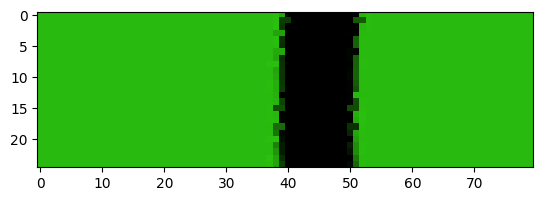

In [65]:
from math import log10
def process_image(im):
    im_baix = im[0:25,0:80]
    plt.imshow(cv2.cvtColor(im_baix, cv2.COLOR_BGR2RGB))
    im_bn = cv2.cvtColor(im_baix, cv2.COLOR_BGR2GRAY)
    im_blurred = cv2.GaussianBlur(im_bn, (5, 5), 0)
    ret, im_th = cv2.threshold(im_blurred,100,255,cv2.THRESH_BINARY_INV)
    im_th_copy = im_th.copy()
    contours, _ = cv2.findContours(im_th_copy, 1, cv2.CHAIN_APPROX_NONE)
    dir = 0
    vel = 0.4
    if len(contours) > 0:
        max_contour = max(contours, key = cv2.contourArea)
        center = cv2.moments(max_contour)
        cx = int(center['m10']/center['m00'])
        cy = int(center['m01']/center['m00'])
        dir = 0
        offset = 5
        center = im_th.shape[1]/2

        if cx < center-offset:
            dir = 0.25
            vel = 0.6
            print("dch",cx)
        elif cx > center+offset:
            dir = -0.25
            vel = 0.6
            print("izq",cx)
        else:
            vel = 1

    return vel,dir


def controlador_cam(robot):
    cam = robot['ground-camera']
    cam.get_image().save("cam.png")
    im = cv2.imread("cam.png")
    vel,dir=process_image(im)
    robot.move(vel,dir)


controlador_cam(robot)
world.reset()
world.seconds(60, [controlador_cam], real_time=True)

## Seguidor de doble línea (mantenerse en el camino)

Adapte el seguidor de la línea para que el robot pueda seguir dos líneas paralelas y permanecer en el camino. Para hacer esto, usaremos la imagen `EX2_pista__6.png` que contiene dos líneas paralelas.

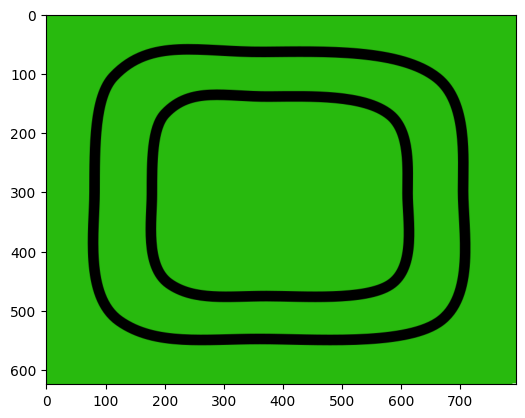

In [66]:
nom_imatge = "EX2_pista_6.png"

# Cargamos la imagen en una variable

img = cv2.imread(nom_imatge)

# Mostramos la imagen
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [69]:
world = bots.World(220, 180, boundary_wall_color="yellow", ground_image_filename=nom_imatge)

amplada_camera = 80
alcada_camera = 50
robot = bots.Scribbler(x=36, y=80, a=90)
robot.add_device(bots.GroundCamera(width=amplada_camera, height=alcada_camera))

world.add_robot(robot)

robot['ground-camera'].watch()
world.watch()

Random seed set to: 8536168


HTML(value='<style>img.pixelated {image-rendering: pixelated;}</style>')

HTML(value='<style>img.pixelated {image-rendering: pixelated;}</style>')

HTML(value='<style>img.pixelated {image-rendering: pixelated;}</style>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00P\x00\x00\x002\x08\x06\x00\x00\x00\xcb-\\\xfc\x00…

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x0…

  0%|          | 0/600 [00:00<?, ?it/s]

izq 46
izq 46
izq 46
izq 46
izq 46
izq 47
izq 47
izq 47
izq 48
izq 49
izq 48
izq 49
izq 49
izq 49
izq 49
izq 49
izq 49
izq 49
izq 49
izq 49
izq 48
izq 48
izq 46
dch 34
izq 46
izq 46
izq 47
izq 46
izq 46
izq 46
izq 46
izq 46
izq 46
izq 47
izq 47
izq 48
izq 48
izq 49
izq 49
izq 49
izq 49
izq 50
izq 50
izq 49
izq 49
izq 49
izq 48
izq 47
izq 46
dch 34
dch 33
dch 33
dch 34
dch 34
izq 46
izq 46
izq 46
izq 46
izq 46
izq 46
izq 46
izq 46
izq 47
izq 48
izq 49
izq 49
izq 50
izq 51
izq 51
izq 52
izq 52
izq 53
izq 52
izq 52
izq 53
izq 52
izq 52
izq 51
izq 51
izq 49
izq 48
izq 46
dch 32
dch 31
dch 30
dch 30
dch 30
dch 31
dch 33
dch 34
izq 47
izq 47
izq 47
izq 48
izq 47
izq 46
dch 34
dch 34
dch 34
dch 34
izq 46
izq 47
izq 47
izq 47
izq 47
izq 46
izq 46
izq 46
izq 46
izq 46
izq 46
izq 47
izq 47
izq 48
izq 49
izq 49
izq 49
izq 50
izq 50
izq 51
izq 50
izq 50
izq 50
izq 50
izq 50
izq 49
izq 48
izq 48
izq 47
izq 46
dch 34
dch 32
dch 32
dch 32
dch 32
dch 32
dch 34
izq 46
izq 46
izq 46
izq 46
izq 46
izq 46

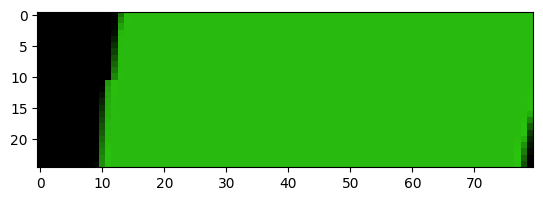

In [70]:
from math import log10
def process_image(im):
    im_baix = im[0:25,0:80]
    plt.imshow(cv2.cvtColor(im_baix, cv2.COLOR_BGR2RGB))
    im_bn = cv2.cvtColor(im_baix, cv2.COLOR_BGR2GRAY)
    im_blurred = cv2.GaussianBlur(im_bn, (5, 5), 0)
    ret, im_th = cv2.threshold(im_blurred,100,255,cv2.THRESH_BINARY)
    im_th_copy = im_th.copy()
    contours, _ = cv2.findContours(im_th_copy, 1, cv2.CHAIN_APPROX_NONE)
    dir = 0
    vel = 0.4
    if len(contours) > 0:
        max_contour = max(contours, key = cv2.contourArea)
        center = cv2.moments(max_contour)
        cx = int(center['m10']/center['m00'])
        cy = int(center['m01']/center['m00'])
        dir = 0
        offset = 5
        center = im_th.shape[1]/2

        if cx < center-offset:
            dir = 0.25
            vel = 0.6
            print("dch",cx)
        elif cx > center+offset:
            dir = -0.25
            vel = 0.6
            print("izq",cx)
        else:
            vel = 1

    return vel,dir


def controlador_cam(robot):
    cam = robot['ground-camera']
    cam.get_image().save("cam.png")
    im = cv2.imread("cam.png")
    vel,dir=process_image(im)
    robot.move(vel,dir)


controlador_cam(robot)
world.reset()
world.seconds(60, [controlador_cam], real_time=True)